#                                                  Yelp Analysis

In [10]:
import pandas as pd
import json
from sqlalchemy import create_engine
import seaborn as sns
from scipy.stats import stats
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

In [3]:
with open(r'C:\Users\Shiv n\OneDrive\Desktop\yelp_dataset\yelp_academic_dataset_checkin.json', encoding = 'utf-8') as f:
    checkin_data = [json.loads(line) for line in f]
    
c_df = pd.DataFrame(checkin_data)
c_df.shape

(131930, 2)

In [3]:
with open(r'C:\Users\Shiv n\OneDrive\Desktop\yelp_dataset\yelp_academic_dataset_tip.json', encoding = 'utf-8') as f:
    tips_data = [json.loads(line) for line in f]
    
t_df = pd.DataFrame(tips_data)
t_df.shape

(908915, 5)

In [4]:
with open(r'C:\Users\Shiv n\OneDrive\Desktop\yelp_dataset\yelp_academic_dataset_user.json', encoding = 'utf-8') as f:
    user_data = [json.loads(line) for line in f]
    
u_df = pd.DataFrame(user_data)
u_df.shape

(1987897, 22)

In [11]:
with open(r'C:\Users\Shiv n\OneDrive\Desktop\yelp_dataset\yelp_academic_dataset_review.json', encoding = 'utf-8') as f:
    review_data = [json.loads(line) for line in f]
    
r_df = pd.DataFrame(review_data)
r_df.shape

(6990280, 9)

In [36]:
with open(r'C:\Users\Shiv n\OneDrive\Desktop\yelp_dataset\yelp_academic_dataset_business.json', encoding = 'utf-8') as f:
    business_data = [json.loads(line) for line in f]

b_df = pd.DataFrame(business_data)
b_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


In [5]:
# if x is a dictionary, json.dumps(x) converts it into a JSON-formatted string else remains unchanged.

b_df['attributes'] = b_df['attributes'].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)
b_df['hours'] = b_df['hours'].apply(lambda x: json.dumps(x) if isinstance(x, dict) else x)

In [6]:
b_df.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{""ByAppointmentOnly"": ""True""}","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{""BusinessAcceptsCreditCards"": ""True""}","Shipping Centers, Local Services, Notaries, Ma...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""8:0-18:30"", ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{""Monday"": ""8:0-22:0"", ""Tuesday"": ""8:0-22:0"", ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{""RestaurantsDelivery"": ""False"", ""OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{""Monday"": ""7:0-20:0"", ""Tuesday"": ""7:0-20:0"", ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"{""BusinessAcceptsCreditCards"": ""True"", ""Wheelc...","Brewpubs, Breweries, Food","{""Wednesday"": ""14:0-22:0"", ""Thursday"": ""16:0-2..."


In [ ]:
from sqlalchemy import create_engine

eng = create_engine(r'mssql+pyodbc://LAPTOP-NKOE7QN2/master?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes')

with eng.connect() as conn:
    conn = conn.execution_options(isolation_level="AUTOCOMMIT")
    conn.execute("CREATE DATABASE yelp")

In [8]:
engg = create_engine(r'mssql+pyodbc://LAPTOP-NKOE7QN2/yelp?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes')

In [ ]:
b_df.to_sql(name='business', con=engg, index=False, if_exists='replace')

In [10]:
c_df.to_sql(name='checkin', con=engg, index=False, if_exists='replace')

-1

In [13]:
t_df.to_sql(name='tips', con=engg, index=False, if_exists='replace')

-1

In [8]:
from sqlalchemy.exc import SQLAlchemyError

In [10]:
try:
    u_df.to_sql(name='users', con=engg, index=False, if_exists='replace')
except SQLAlchemyError as e:
    try:
        engg.rollback()                  # Roll back the transaction
    except Exception as rollback_error:

In [ ]:
# Batching with a loop may result in slower performance due to the repeated calls to the database.

batch_size = 10000
for start in range(0, len(r_df), batch_size):
    end = start + batch_size
    r_df[start:end].to_sql(name='reviews', con=engg, index=False, if_exists='append')

By specifying the <b> chunksize parameter <b/>.
    
you instruct Pandas to split the larger DataFrame into smaller batches and insert them sequentially.

In general, using <b>method='multi'  in to_sql is likely to be faster </b>
because it optimizes the number of transactions and reduces overhead. 

for <b>speed and efficiency,</b>  the <b>method='multi' </b> approach is generally the way to go!

In [8]:
r_df.to_sql(name='reviewsF', con= engg, index=False, if_exists='append', method='multi', chunksize=1000)

# Hypothesis testing :

<b>. Higher levels of user engagement (more reviews, tips, and check-ins) correlate with higher review counts and ratings for restaurants.</b>

<b>. Positive sentiment expressed in reviews and tips contributes to higher overall ratings and review counts for restaurants.</b>

<b>. Consistent engagement over time is positively associated with sustained business success for restaurants.</b>

In [9]:
from IPython.display import display

In [11]:
engx = create_engine('mssql+pyodbc://LAPTOP-NKOE7QN2/yelp?driver=ODBC+Driver+17+for+SQL+Server&Trusted_Connection=yes')

In [41]:
tables = pd.read_sql("select table_name from information_schema.tables where table_type = 'Base table'", engx)
tables

,table_name
0,checkin
1,tips
2,business
3,users
4,reviews


In [42]:
# Explore the data available in those tables

for table in tables['table_name']:
    display(pd.read_sql(f"select top 3 * from {table}", engx))

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"{""ByAppointmentOnly"": ""True""}","Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"{""BusinessAcceptsCreditCards"": ""True""}","Shipping Centers, Local Services, Notaries, Ma...","{""Monday"": ""0:0-0:0"", ""Tuesday"": ""8:0-18:30"", ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"{""BikeParking"": ""True"", ""BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{""Monday"": ""8:0-22:0"", ""Tuesday"": ""8:0-22:0"", ..."


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,3tdK-JDgYet3d68Ur6rX8w,Rana Ruth,4,2015-08-16 21:48:35,4,0,0,,"D06k5aHVIDdoNO2fGv1X3A, s8J854j6aZ3M410n7LrO-A...",0,...,0,0,0,0,0,0,0,0,0,0
1,xjR4c1FaQynH4hT5EDuaLw,Nina,14,2011-03-22 15:02:41,46,7,4,,"WNzl396rYCsumE8GZnt6Ww, ZcomgcL_kTj4uO92inte-A...",1,...,0,0,0,0,0,2,0,0,1,0
2,scJNz50MtqIgJ15bnSZ_oA,Hall,5,2011-03-01 00:50:35,8,1,1,,"JvHCFwoHZ0SklC3JTW3A1A, 38pa4L2K0-1mFNgvmNX2XQ...",0,...,0,0,0,0,0,0,0,0,0,0


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30


In [3]:
# FETCH THE ONLY ACTIVE RESTAURANT BUSINESSESS  

pd.read_sql("""select categories, name, is_open from business 
                      where lower(categories) like '%restaurant%' and is_open = 1""", engx)

,categories,name,is_open
0,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",St Honore Pastries,1
1,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",Sonic Drive-In,1
2,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",Sonic Drive-In,1
3,"Vietnamese, Food, Restaurants, Food Trucks",Vietnamese Food Truck,1
4,"American (Traditional), Restaurants, Diners, B...",Denny's,1
...,...,...,...
34999,"Bars, Gastropubs, Sandwiches, Nightlife, Resta...",Bittercreek Alehouse,1
35000,"Restaurants, Sandwiches, Convenience Stores, C...",Wawa,1
35001,"Cafes, Juice Bars & Smoothies, Coffee & Tea, R...",Dutch Bros Coffee,1
35002,"Restaurants, Mexican",Adelita Taqueria & Restaurant,1


In [43]:
from scipy.stats import stats
import numpy as np

In [12]:
df = pd.read_sql("""SELECT * FROM business WHERE LOWER(categories) LIKE '%restaurant%' and is_open = 1""", engx)

np.median(df['review_count'])

40.0

In [45]:
df.describe()

,latitude,longitude,stars,review_count,is_open
count,35004.000000,35004.000000,35004.000000,35004.000000,35004.0
mean,37.056601,-87.884503,3.523969,104.097789,1.0
std,6.093946,13.777288,0.862640,220.546599,0.0
min,27.564457,-120.083748,1.000000,5.000000,1.0
25%,32.206814,-90.237859,3.000000,16.000000,1.0
50%,39.492560,-86.040598,3.500000,40.000000,1.0
75%,39.961510,-75.360227,4.000000,109.000000,1.0
max,53.679197,-74.680250,5.000000,7568.000000,1.0


In [10]:
pd.read_sql("""SELECT DISTINCT
                      PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY review_count) OVER() AS MEDIAN,
                      MIN(review_count) OVER() AS Min_rvcount, 
                      MAX(review_count) OVER() AS Max_rvcount, 
                      AVG(CAST(review_count AS FLOAT)) OVER() AS Avg_rvcount,
                      PERCENTILE_CONT(0.5) WITHIN GROUP(ORDER BY stars) OVER()  AS MEDIAN_stars,
	                  MIN(stars) OVER() AS MIN_stars,
	                  MAX(stars) OVER() AS MAX_stars,
	                  AVG(stars) OVER() AS AVG_stars
               FROM business
               WHERE LOWER(categories) LIKE '%restaurant%' and is_open = 1;""", engx).transpose()

,0
MEDIAN,40.000000
Min_rvcount,5.000000
Max_rvcount,7568.000000
Avg_rvcount,104.097789
MEDIAN_stars,3.500000
MIN_stars,1.000000
MAX_stars,5.000000
AVG_stars,3.523969


<Axes: >

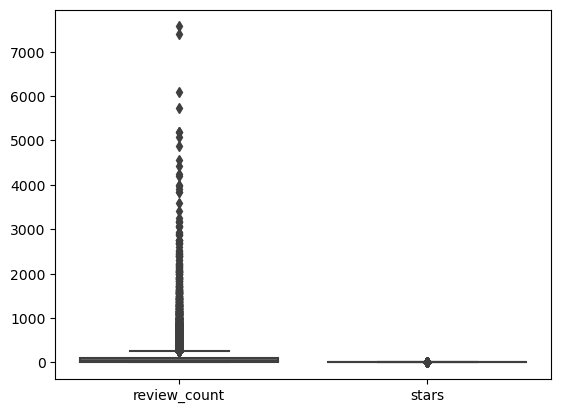

In [11]:
sns.boxplot(data = df)

In [5]:
# remove outliers by using IQR (Interquartile range)

for col in ['review_count', 'stars']:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    
    lower_bound = q1 - 1.5 * IQR
    upper_bound = q3 + 1.5 * IQR
    
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

<Axes: >

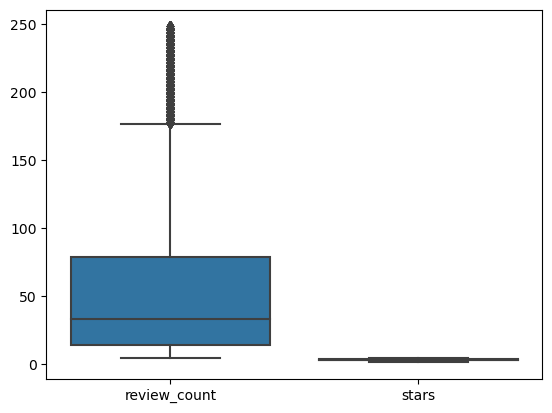

In [7]:
sns.boxplot(data = df[['review_count', 'stars']])

In [14]:
df.describe()

,review_count,stars
count,31348.000000,31348.000000
mean,56.226298,3.492216
std,56.623333,0.865101
min,5.000000,1.500000
25%,14.000000,3.000000
50%,33.000000,3.500000
75%,79.000000,4.000000
max,248.000000,5.000000


In [17]:
# FETCH RESTAURANTS WITH HIGHEST NUMBER OF REVIEWS AND THEIR AVERAGE RATINGS

dfz = df.groupby('name').agg({'review_count' : 'sum', 'stars' : 'mean'}).reset_index()

dfz['rank'] = dfx['review_count'].rank(method = 'dense', ascending = False)

dfz = dfz[dfz['rank'] < 11].sort_values(by = 'review_count', ascending = False)
dfz

,name,review_count,stars,rank
12577,McDonald's,16490,1.868702,1.0
4095,Chipotle Mexican Grill,9071,2.381757,2.0
6844,First Watch,8688,3.896552,3.0
339,Acme Oyster House,8343,4.000000,4.0
19358,Taco Bell,8017,2.141813,5.0
3893,Chick-fil-A,7943,3.381410,6.0
14250,Oceana Grill,7400,4.000000,7.0
2740,Buffalo Wild Wings,6810,2.347458,8.0
14844,Panera Bread,6613,2.661905,9.0
8497,Hattie B’s Hot Chicken - Nashville,6093,4.500000,10.0


In [18]:
pd.read_sql("""SELECT  TOP 10 name, SUM(review_count) Max_rvcount, AVG(stars) as Avg_ratings
               FROM business
               WHERE LOWER(categories) LIKE '%restaurant%' AND is_open = 1
               GROUP BY name
               ORDER BY SUM(review_count) DESC""", engx)

,name,Max_rvcount,Avg_ratings
0,McDonald's,16490,1.868702
1,Chipotle Mexican Grill,9071,2.381757
2,First Watch,8688,3.896552
3,Acme Oyster House,8343,4.000000
4,Taco Bell,8017,2.141813
5,Chick-fil-A,7967,3.373418
6,Oceana Grill,7400,4.000000
7,Buffalo Wild Wings,6810,2.347458
8,Panera Bread,6613,2.661905
9,Hattie B’s Hot Chicken - Nashville,6093,4.500000


In [23]:
# DO RESTAURANTS WITH HIGHER ENGAGEMENT TEND TO HAVE HIGHER RATINGS ?

pb = df.groupby(['stars', 'name'])['review_count'].mean().reset_index()

pb['rank'] = pb['review_count'].rank(method = 'dense', ascending = False)

pb = pb[pb['rank'] < 11][['stars', 'name', 'review_count']].sort_values(by= 'review_count', ascending = False)

pb

,stars,name,review_count
15573,4.0,Oceana Grill,7400.0
20903,4.5,Hattie B’s Hot Chicken - Nashville,6093.0
22881,4.5,Reading Terminal Market,5721.0
23033,4.5,Ruby Slipper - New Orleans,5193.0
8195,3.5,Mother's Restaurant,5185.0
16529,4.0,Royal House,5070.0
19918,4.5,Commander's Palace,4876.0
14738,4.0,Luke,4554.0
12200,4.0,Cochon,4421.0
3917,3.0,Pat's King of Steaks,4250.0


In [24]:
pd.read_sql("""SELECT  TOP 10 stars, name, AVG(review_count) AS Avg_rvcount
               FROM business
               WHERE LOWER(categories) LIKE '%restaurant%' AND is_open = 1
               GROUP BY stars, name
               ORDER BY AVG(review_count) DESC""", engx)

,stars,name,Avg_rvcount
0,4.0,Oceana Grill,7400
1,4.5,Hattie B’s Hot Chicken - Nashville,6093
2,4.5,Reading Terminal Market,5721
3,4.5,Ruby Slipper - New Orleans,5193
4,3.5,Mother's Restaurant,5185
5,4.0,Royal House,5070
6,4.5,Commander's Palace,4876
7,4.0,Luke,4554
8,4.0,Cochon,4421
9,3.0,Pat's King of Steaks,4250


In [16]:
mdf = pd.read_sql("""select M.avg_rating, AVG(M.review_count) avg_review_count, 
                      AVG(M.total_checking) avg_checking, AVG(M.total_tips) avg_tips
               from (
                      select x.business_id, SUM(x.review_count) review_count, AVG(x.stars) avg_rating, 
                             SUM(y.checking_count) total_checking ,SUM(z.tips_Count) total_tips
                      from business x
                      left join (select business_id, COUNT(value) checking_count 
                                 from 
                                      (select *
                                       from checkin
                                       cross apply string_split(date, ',')) a
                                 group by business_id) as y
                      on x.business_id = y.business_id
                      left join (select business_id, count(*) tips_Count
                                 from tips
                                 group by business_id) as z
                      on x.business_id = z.business_id
                      where LOWER(categories) like '%restaurant%' and is_open = 1
                      group by x.business_id 
                    ) as M
               group by M.avg_rating
               order by M.avg_rating """, engx)

mdf

,avg_rating,avg_review_count,avg_checking,avg_tips
0,1.0,14,17,2
1,1.5,24,34,3
2,2.0,28,53,4
3,2.5,43,92,7
4,3.0,63,140,10
5,3.5,103,208,15
6,4.0,159,310,23
7,4.5,141,214,19
8,5.0,38,37,5


<BarContainer object of 9 artists>

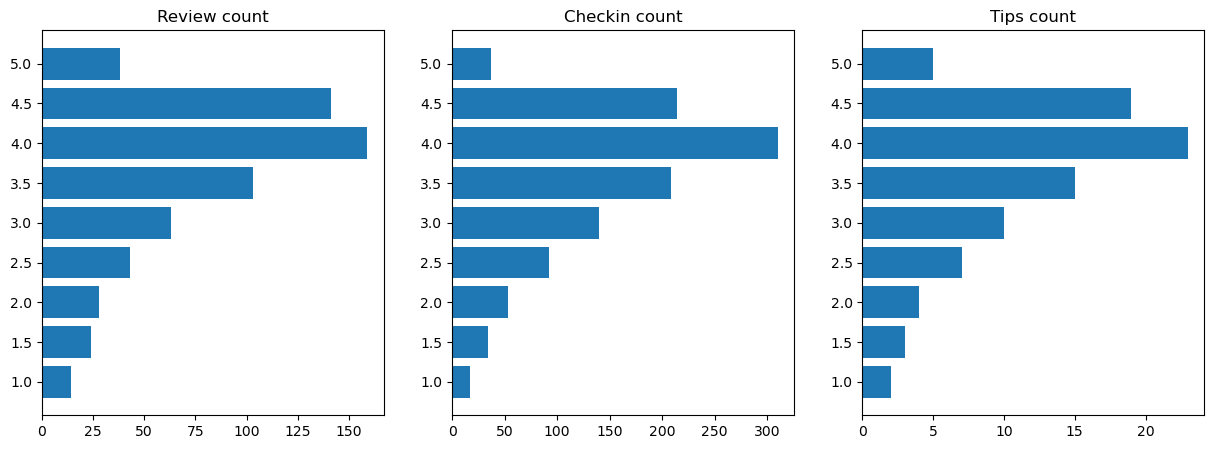

In [43]:
plt.figure(figsize=(15,5))
plt.subplot(1,3,1)
plt.title('Review count')
plt.barh(mdf['avg_rating'].astype(str), mdf['avg_review_count'])


plt.subplot(1,3,2)
plt.title('Checkin count')
plt.barh(mdf['avg_rating'].astype(str), mdf['avg_checking'])


plt.subplot(1,3,3)
plt.title('Tips count')
plt.barh(mdf['avg_rating'].astype(str), mdf['avg_tips'])


In [45]:
# IS THERE ANY CORRELATION BETWEEN THE review count, checkin count and tips count FOR A BUSINESS

crf = pd.read_sql("""select x.business_id, SUM(x.review_count) review_count, SUM(y.checking_count) total_checking, 
                            SUM(z.tips_Count) total_tips, AVG(x.stars) avg_rating,
                            CASE WHEN x.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END categories
                      from business x
                      left join (select business_id, COUNT(value) checking_count 
                                 from 
                                      (select *
                                       from checkin
                                       cross apply string_split(date, ',')) a
                                 group by business_id) as y
                      on x.business_id = y.business_id
                      left join (select business_id, count(*) tips_Count
                                 from tips
                                 group by business_id) as z
                      on x.business_id = z.business_id
                      where LOWER(categories) like '%restaurant%' and is_open = 1
                      group by x.business_id, x.stars""", engx).dropna()

crf

,business_id,review_count,total_checking,total_tips,avg_rating,categories
2,_u9B-BsIZ43FBNS7p2pQUA,13,5.0,3.0,1.0,Low-Rated
3,07s3mxO67e8L8k3tFz4oIg,9,32.0,1.0,1.0,Low-Rated
5,0UYn-R_LF-V0KSlYFRi3PA,21,35.0,2.0,1.0,Low-Rated
6,1Jo4UC0YNPoPm9Gfur8tQA,39,23.0,3.0,1.0,Low-Rated
9,2s1e-4t_35JfQBXAluqqzg,5,14.0,1.0,1.0,Low-Rated
...,...,...,...,...,...,...
34995,ytaVHTK7kdHxUscf2PCrow,14,31.0,8.0,5.0,High-Rated
34996,Yu_tXvUoyOj5SpeDUOZwnQ,43,35.0,4.0,5.0,High-Rated
34998,z83W435NrTZyazSaX-9tvg,5,3.0,1.0,5.0,High-Rated
35001,zoAZydP_v380Yydf-2u3hw,5,7.0,3.0,5.0,High-Rated


In [32]:
# Correlation above 0.5 is considered as positive correlation 

crf[['review_count', 'total_checking', 'total_tips']].corr()

,review_count,total_checking,total_tips
review_count,1.000000,0.807877,0.837101
total_checking,0.807877,1.000000,0.905120
total_tips,0.837101,0.905120,1.000000


<Axes: >

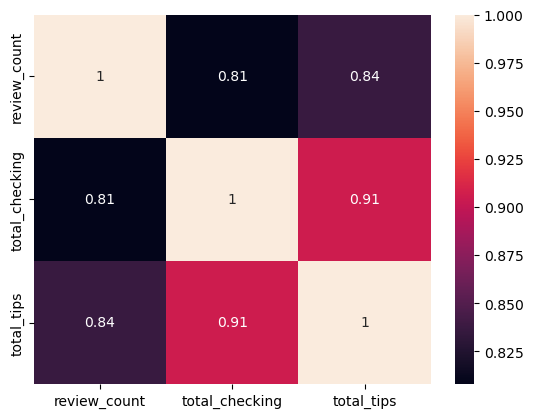

In [35]:
sns.heatmap(crf[['review_count', 'total_checking', 'total_tips']].corr(), annot= True)

In [51]:
# IS THERE A DIFFERENCE IN THE USER ENGAGEMENT (reviews, tips and checkin) BETWEEN HIGH-RATED AND LOW-RATED BUSINESS 

drf = crf.groupby('categories')[['review_count', 'total_checking', 'total_tips']].mean().reset_index()

drf.rename(columns= {'review_count' : 'avg_reviews', 'total_checking' : 'avg_checkin', 'total_tips' : 'avg_tips'})

,categories,avg_reviews,avg_checkin,avg_tips
0,High-Rated,143.916814,263.524127,19.260643
1,Low-Rated,52.213997,109.781758,7.772544


User engagement is high in the High-Rated restaurants compare to Low-Rated

In [13]:
# CALCULATE THE SUCCESS SCORE BASED ON THE avg_ratings AND total_reviews

def success_score(data):
    result = []
    for index, row in data.iterrows():
        score = row['avg_ratings'] * np.log(row['total_reviews'] + 1)
        result.append(score)
        
    return result

<b> index </b> captures the row index for the current row in the iteration.

<b>row </b> is the actual data of the row so that <b>we can access individual values using row['column_name']. </b>

<b> df.iterrows() </b> is a method in pandas that allows you to iterate over the rows of a DataFrame



<b>Logarithmic Scaling: </b>
If the review_count is very large, the log function reduces its impact in a controlled way. For example, going from 10 reviews to 100 reviews has a large effect, but going from 10,000 reviews to 20,000 reviews will have less impact on the final score.

<b>Why Add 1 (np.log(row['review_count'] + 1)): </b> This avoids taking the logarithm of zero. <b>If review_count is 0, 
np.log(0)</b> would result in an undefined or infinite value, but np.log(1) is 0, which works well in this context.

In [14]:
# HOW DO SUCCESS SCORE (Based on avg_ratings AND total_reviews) OF RESTAURANT VARY ACROSS DIFFERENT STATES AND CITIES

xdf = pd.read_sql("""select top 10 city, state, AVG(stars) avg_ratings, 
                     AVG(latitude) avg_latitude, AVG(longitude) avg_longitude,
                     SUM(review_count) total_reviews, count(*) total_restaurants
                     from business
                     where LOWER(categories) LIKE '%restaurant%' AND is_open = 1
                     group by city, state
                     order by SUM(review_count) desc """, engx)

xdf

,city,state,avg_ratings,avg_latitude,avg_longitude,total_reviews,total_restaurants
0,Philadelphia,PA,3.585577,39.978447,-75.151862,495576,3529
1,New Orleans,LA,3.764537,29.958667,-90.075945,387062,1393
2,Nashville,TN,3.570071,36.143781,-86.771756,261028,1684
3,Tampa,FL,3.624049,27.999055,-82.477556,236515,1971
4,Tucson,AZ,3.458055,32.236753,-110.936069,192708,1645
5,Indianapolis,IN,3.482677,39.804506,-86.141129,186676,1905
6,Reno,NV,3.584375,39.506149,-119.805626,151636,800
7,Santa Barbara,CA,3.913677,34.423662,-119.710383,127068,446
8,Saint Louis,MO,3.502088,38.617332,-90.297616,125866,958
9,Boise,ID,3.597015,43.608677,-116.237632,55551,603


In [15]:
xdf['success_score'] = success_score(xdf)
xdf

,city,state,avg_ratings,avg_latitude,avg_longitude,total_reviews,total_restaurants,success_score
0,Philadelphia,PA,3.585577,39.978447,-75.151862,495576,3529,47.019381
1,New Orleans,LA,3.764537,29.958667,-90.075945,387062,1393,48.435823
2,Nashville,TN,3.570071,36.143781,-86.771756,261028,1684,44.527310
3,Tampa,FL,3.624049,27.999055,-82.477556,236515,1971,44.843149
4,Tucson,AZ,3.458055,32.236753,-110.936069,192708,1645,42.080848
5,Indianapolis,IN,3.482677,39.804506,-86.141129,186676,1905,42.269723
6,Reno,NV,3.584375,39.506149,-119.805626,151636,800,42.758887
7,Santa Barbara,CA,3.913677,34.423662,-119.710383,127068,446,45.995434
8,Saint Louis,MO,3.502088,38.617332,-90.297616,125866,958,41.124949
9,Boise,ID,3.597015,43.608677,-116.237632,55551,603,39.297657


In [16]:
import folium

In [23]:
mo = folium.Map(location=[xdf['avg_latitude'].mean(), xdf['avg_longitude'].mean()], zoom_start=4)

# Define a color scale based on success_score

color_scale = folium.LinearColormap(colors= ['red', 'yellow', 'green'],
                                    vmin= xdf['success_score'].min(),
                                    vmax= xdf['success_score'].max())

# Add markers to the map

for index, row in xdf.iterrows():
    folium.CircleMarker(location= [row['avg_latitude'], row['avg_longitude']],
                        radius= 5,
                        color= color_scale(row['success_score']),   # Color of the marker
                        fill= True,
                        fill_color= color_scale(row['success_score']),   # Fill color based on success_score
                        fill_opacity=0.7,
                        popup=f"success_score = {row['success_score']}").add_to(mo)


mo.add_child(color_scale)

In [ ]:
# ARE THERE ANY PATTERNS IN USER ENGAGEMENT OVER TIME FOR SUCCESSFUL BUSINESS COMPARE TO LESS SUCCESSFUL ONE ?
# ARE THERE ANY SEASONAL TRENDS IN USER ENGAGEMENT FOR RESTAURANT ?


In [18]:
high_rated_engagement = pd.read_sql("""with rev_temp as (select FORMAT(cast(date as DATE), 'MMM-yy') FM, COUNT(*) review_count
                                                         from reviews x
                                                         join business y
                                                         on x.business_id = y.business_id
                                                         where LOWER(y.categories) LIKE '%restaurant%' 
                                                         and y.is_open = 1 and y.stars >= 3.5
                                                         group by FORMAT(cast(date as DATE), 'MMM-yy')),
				
	                                        tip_temp as (select FORMAT(cast(date as DATE), 'MMM-yy') FM, COUNT(*) tips_count
                                                         from tips a
			                                             join business b
			                                             on a.business_id = b.business_id
			                                             where LOWER(b.categories) LIKE '%restaurant%' 
                                                         and b.is_open = 1 and b.stars >= 3.5
                                                         group by FORMAT(cast(date as DATE), 'MMM-yy'))

                                       select m.FM review_FM, m.review_count review_count, n.tips_count tips_count
                                       from rev_temp m
                                       join tip_temp n
                                       on m.FM = n.FM
                                       order by m.FM """, engx)

high_rated_engagement.head()

,review_FM,review_count,tips_count
0,Apr-09,1143,23
1,Apr-10,1922,471
2,Apr-11,3693,2242
3,Apr-12,4709,4050
4,Apr-13,6016,3594


In [24]:
low_rated_engagement = pd.read_sql("""with rev_temp as (select FORMAT(cast(date as DATE), 'MMM-yy') FM, COUNT(*) review_count
                                                         from reviews x
                                                         join business y
                                                         on x.business_id = y.business_id
                                                         where LOWER(y.categories) LIKE '%restaurant%' 
                                                         and y.is_open = 1 and y.stars < 3.5
                                                         group by FORMAT(cast(date as DATE), 'MMM-yy')),
				
	                                        tip_temp as (select FORMAT(cast(date as DATE), 'MMM-yy') FM, COUNT(*) tips_count
                                                         from tips a
			                                             join business b
			                                             on a.business_id = b.business_id
			                                             where LOWER(b.categories) LIKE '%restaurant%' 
                                                         and b.is_open = 1 and b.stars < 3.5
                                                         group by FORMAT(cast(date as DATE), 'MMM-yy'))

                                       select m.FM review_FM, m.review_count review_count, n.tips_count tips_count
                                       from rev_temp m
                                       join tip_temp n
                                       on m.FM = n.FM
                                       order by m.FM """, engx)

low_rated_engagement.head()

,review_FM,review_count,tips_count
0,Apr-09,195,3
1,Apr-10,267,97
2,Apr-11,598,508
3,Apr-12,823,923
4,Apr-13,1005,811


In [19]:
time_rating = pd.read_sql("""select FORMAT(cast(date as DATE), 'MMM-yy') FM, AVG(stars) avg_ratings
                             from reviews
                             group by FORMAT(cast(date as DATE), 'MMM-yy')
                             order by FORMAT(cast(date as DATE), 'MMM-yy')""", engx)

time_rating.head()

,FM,avg_ratings
0,Apr-05,4.111111
1,Apr-06,3.933333
2,Apr-07,3.912046
3,Apr-08,3.911338
4,Apr-09,3.686567


In [20]:
time_rating['FM'] = pd.to_datetime(time_rating['FM'], format='%b-%y', errors='coerce')

time_rating.sort_values(by='FM', inplace=True)

time_rating = time_rating[time_rating['FM'] > '2017']
time_rating.head()

,FM,avg_ratings
62,2017-02-01,3.798144
130,2017-03-01,3.781260
12,2017-04-01,3.779810
147,2017-05-01,3.750601
113,2017-06-01,3.779101


In [21]:
high_rated_engagement['review_FM'] = pd.to_datetime(high_rated_engagement['review_FM'], format= '%b-%y', errors = 'coerce')

high_rated_engagement.sort_values(by = 'review_FM', inplace= True)

high_rated_engagement = high_rated_engagement[high_rated_engagement['review_FM'] > '2017']
high_rated_engagement.head()

,review_FM,review_count,tips_count
46,2017-02-01,14622,3572
97,2017-03-01,17058,4640
8,2017-04-01,16559,4634
110,2017-05-01,17754,4293
85,2017-06-01,17944,4232


In [25]:
low_rated_engagement['review_FM'] = pd.to_datetime(low_rated_engagement['review_FM'], format= '%b-%y', errors= 'coerce')

low_rated_engagement.sort_values(by = 'review_FM', inplace= True)

low_rated_engagement = low_rated_engagement[low_rated_engagement['review_FM'] > '2017']

low_rated_eng = low_rated_engagement.rename(columns= {'review_FM' : 'FM'})
low_rated_eng.head()

,FM,review_count,tips_count
46,2017-02-01,2428,548
97,2017-03-01,2730,677
8,2017-04-01,2713,690
110,2017-05-01,2892,736
85,2017-06-01,2879,685


In [26]:
# we are going to store avg_ratings into high_rated_engagement dataframe

high_rated_eng = pd.merge(high_rated_engagement, time_rating, left_on = 'review_FM', right_on = 'FM', how = 'inner')

high_rated_eng = high_rated_eng[['review_FM', 'review_count', 'tips_count', 'avg_ratings']]

high_rated_eng = high_rated_eng.rename(columns= {'review_FM' : 'FM'})
high_rated_eng.head()

,FM,review_count,tips_count,avg_ratings
0,2017-02-01,14622,3572,3.798144
1,2017-03-01,17058,4640,3.781260
2,2017-04-01,16559,4634,3.779810
3,2017-05-01,17754,4293,3.750601
4,2017-06-01,17944,4232,3.779101


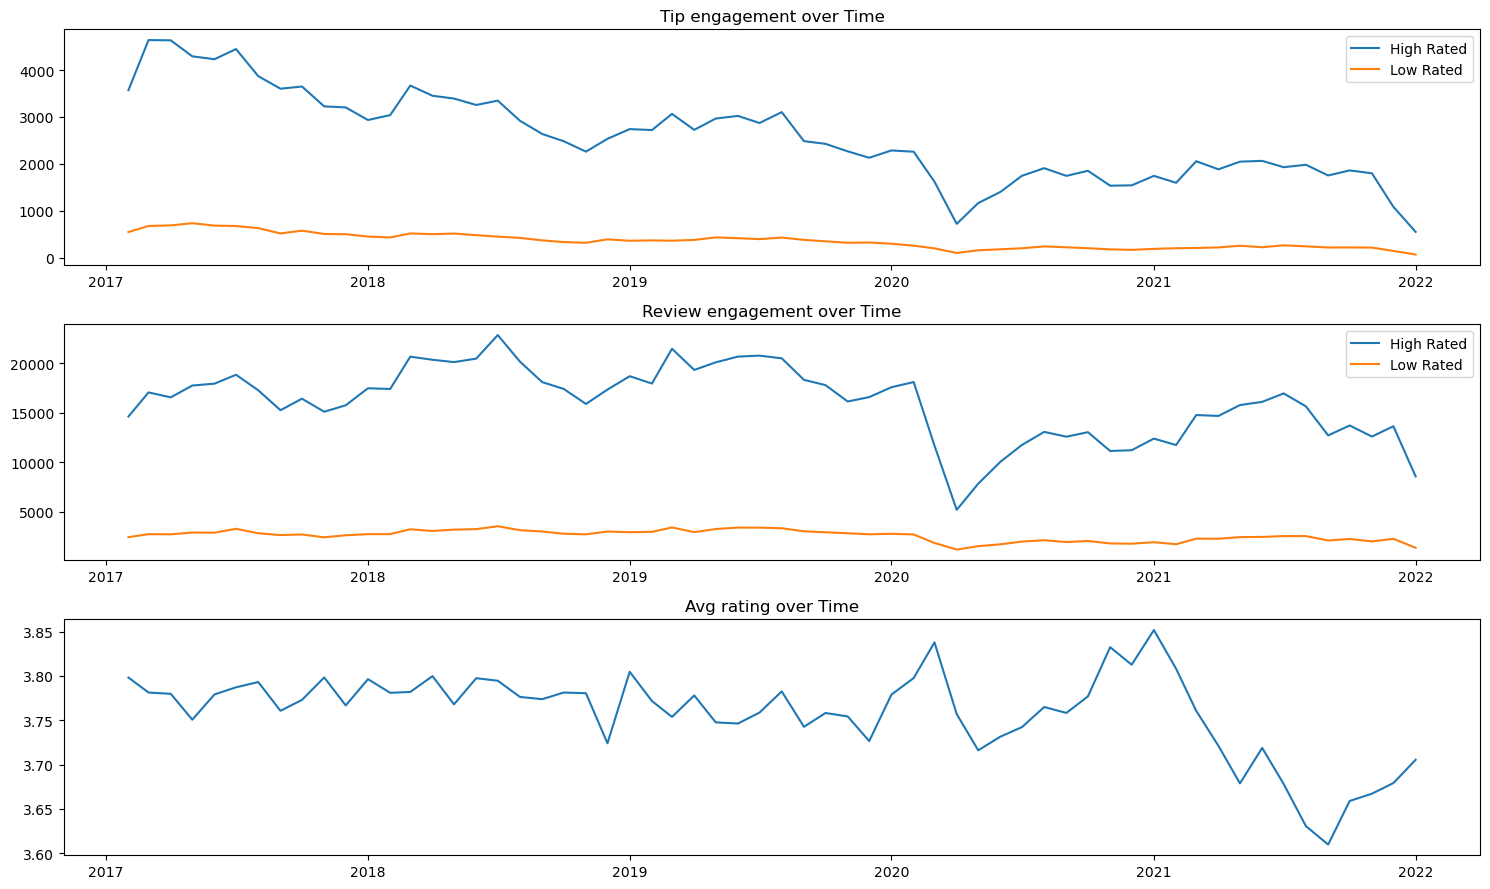

In [28]:
plt.figure(figsize= (15,9))

plt.subplot(3,1,1)
plt.title('Tip engagement over Time')
plt.plot(high_rated_eng['FM'], high_rated_eng['tips_count'], label= 'High Rated')
plt.plot(low_rated_eng['FM'], low_rated_eng['tips_count'], label= 'Low Rated')
plt.legend()

plt.subplot(3,1,2)
plt.title('Review engagement over Time')
plt.plot(high_rated_eng['FM'], high_rated_eng['review_count'], label= 'High Rated')
plt.plot(low_rated_eng['FM'], low_rated_eng['review_count'], label= 'Low Rated')
plt.legend()

plt.subplot(3,1,3)
plt.title('Avg rating over Time')
plt.plot(time_rating['FM'], time_rating['avg_ratings'])
plt.tight_layout()

In [29]:
high_rated_eng.head()

,FM,review_count,tips_count,avg_ratings
0,2017-02-01,14622,3572,3.798144
1,2017-03-01,17058,4640,3.781260
2,2017-04-01,16559,4634,3.779810
3,2017-05-01,17754,4293,3.750601
4,2017-06-01,17944,4232,3.779101


In [ ]:
# FIND THE seasonality trend OF HIGH RATED ENGAGEMENT BASED ON time

In [30]:
#Index has to be time in order to apply seasonality trend function 

tips_count_H = high_rated_eng[['FM', 'tips_count']].set_index('FM')
review_count_H = high_rated_eng[['FM', 'review_count']].set_index('FM')
avg_ratings_H = high_rated_eng[['FM', 'avg_ratings']].set_index('FM')

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose

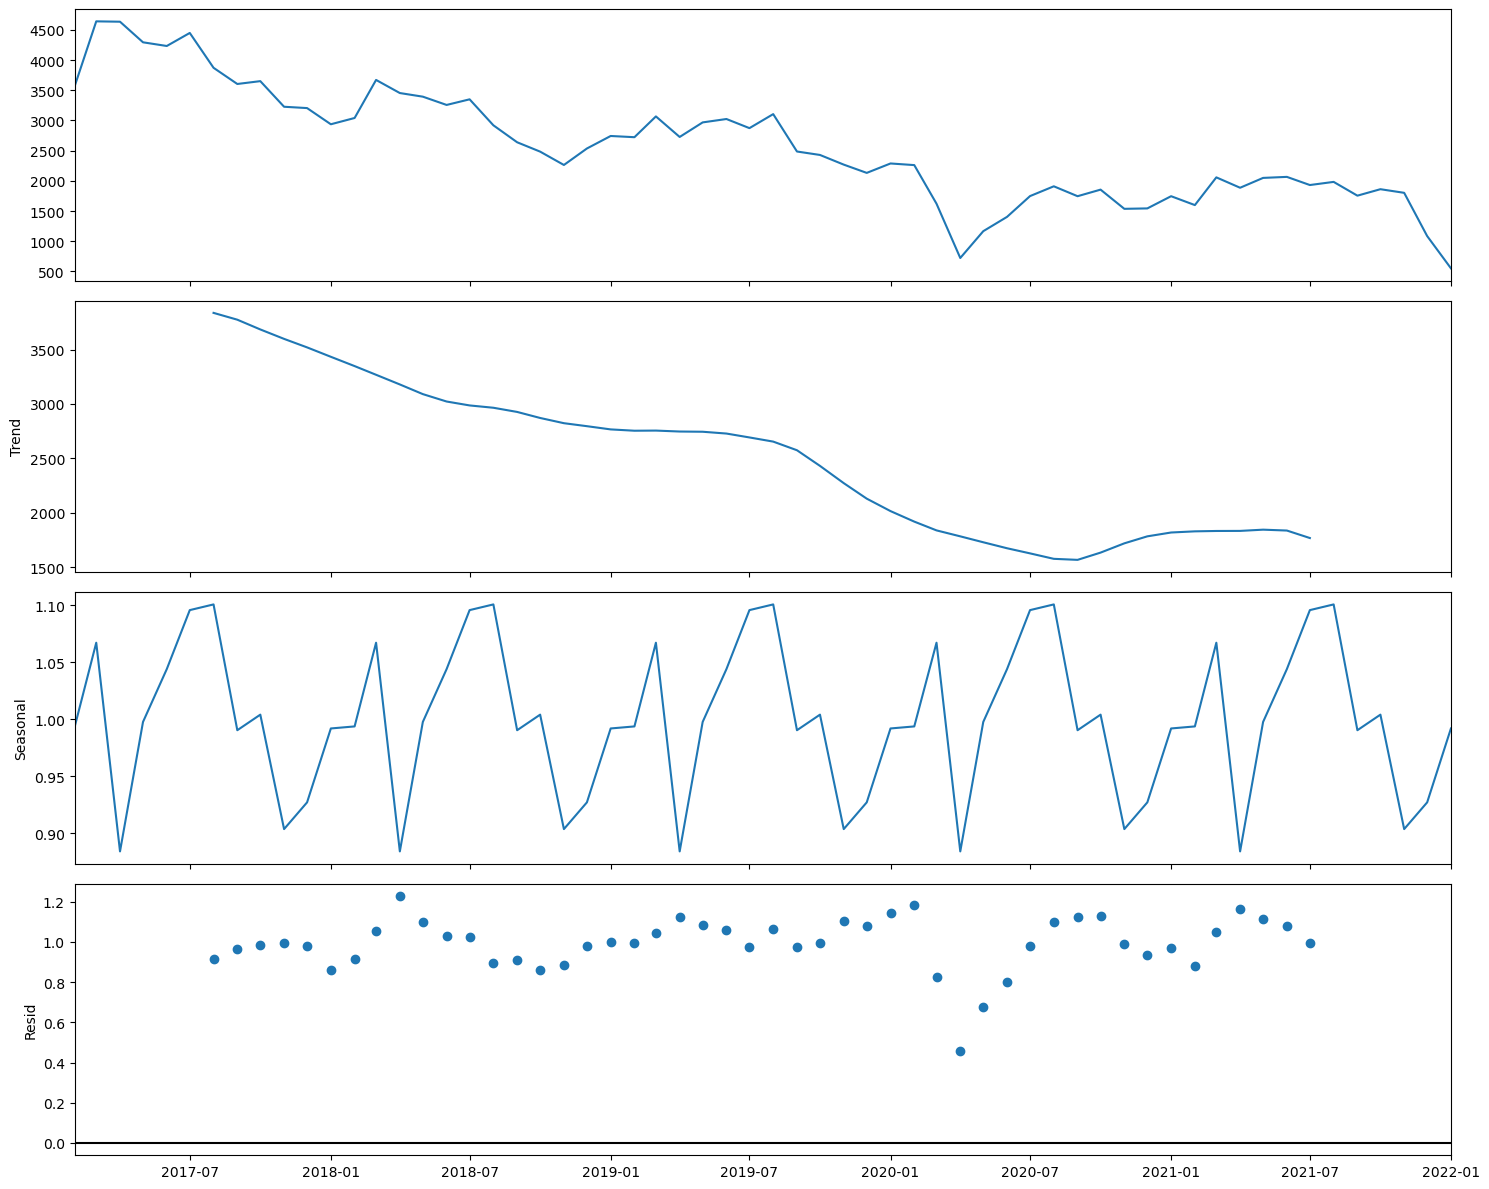

In [62]:
md = seasonal_decompose(tips_count_H, model= 'multiplicative', period= 12)

plt.rcParams.update({'figure.figsize': (15,12)})

md.plot()
plt.show()

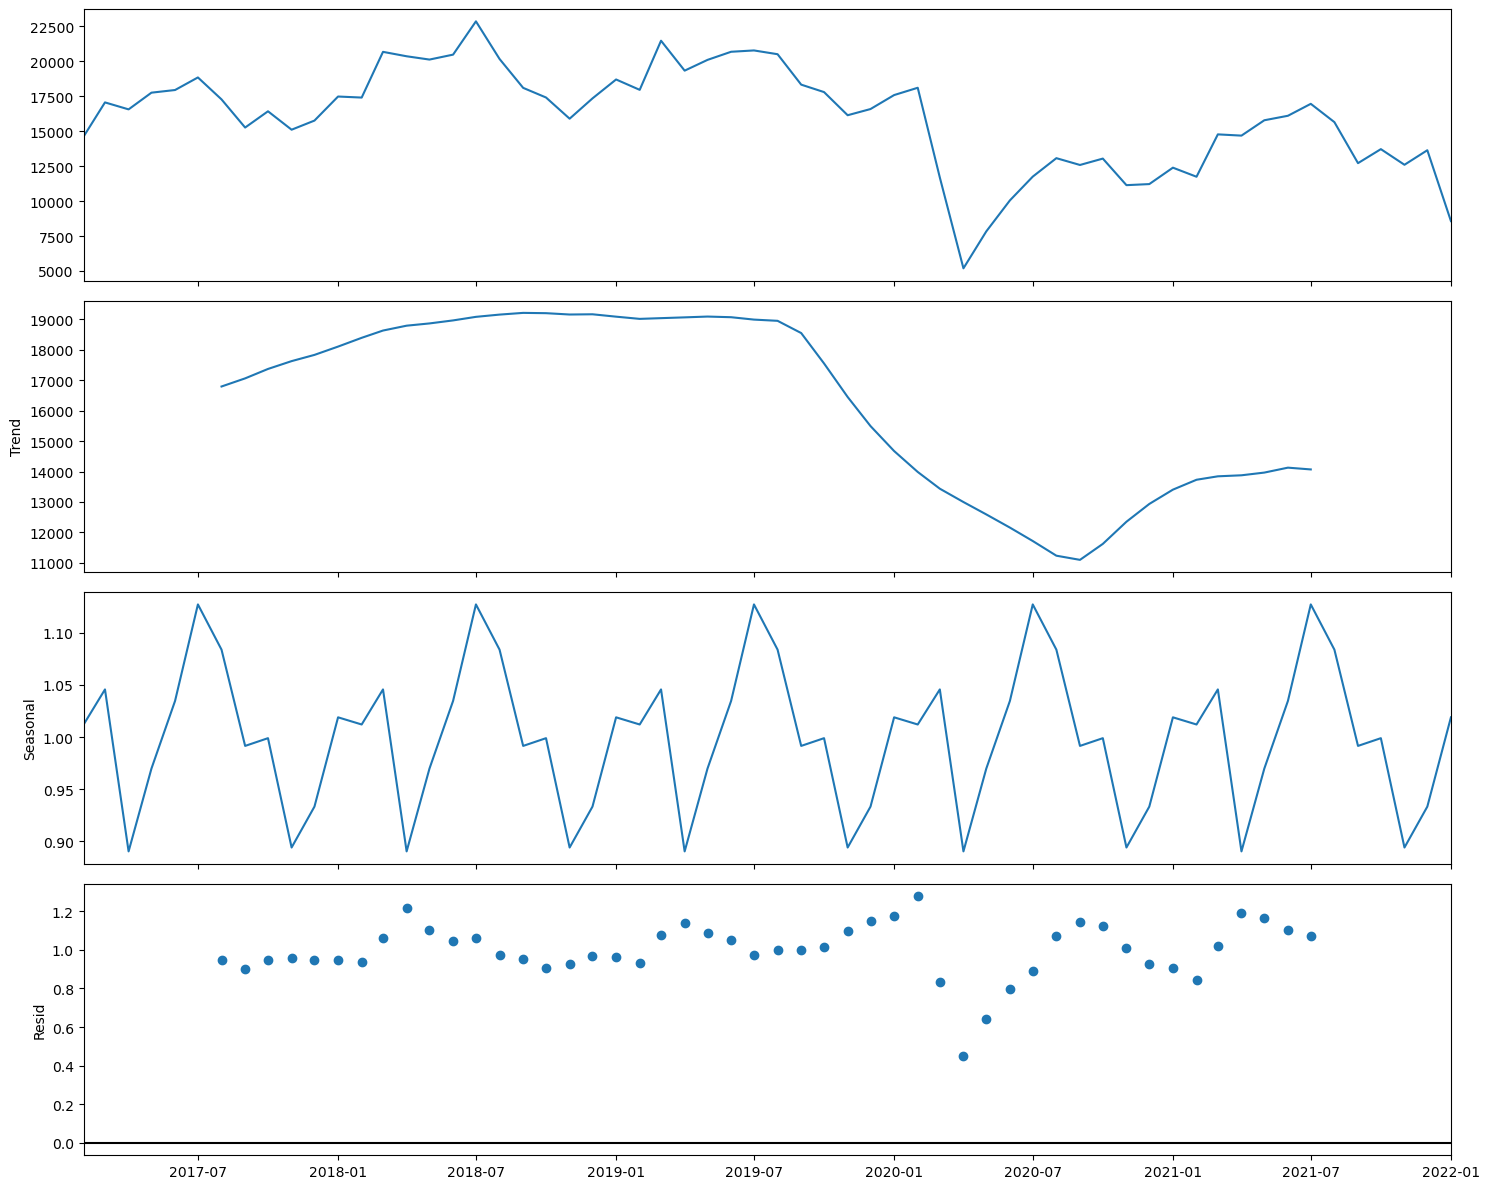

In [64]:
md2 = seasonal_decompose(review_count_H, model= 'multiplicative', period= 12)

plt.rcParams.update({'figure.figsize': (15,12)})

md2.plot()
plt.show()

In [41]:
# FIND THE BUSIEST HOURS FOR RESTAURANTS

In [45]:
review_eng = pd.read_sql("""SELECT DATEPART(HOUR, date) [hour], COUNT(review_id) review_count
                            FROM reviews
                            group by DATEPART(HOUR, date)
                            order by DATEPART(HOUR, date)""", engx)
review_eng.head()

,hour,review_count
0,0,237942
1,1,236100
2,2,215287
3,3,175084
4,4,128466


In [46]:
tip_eng = pd.read_sql("""SELECT DATEPART(HOUR, date) [hour], COUNT(user_id) tip_count
                         FROM tips
                         group by DATEPART(HOUR, date)
                         order by DATEPART(HOUR, date)""", engx)
tip_eng.head()

,hour,tip_count
0,0,74238
1,1,67568
2,2,54532
3,3,40093
4,4,27227


In [60]:
checkin_eng = pd.read_sql("""with t1 as (SELECT business_id, value [date]
                                         FROM checkin
                                         CROSS APPLY string_split(date, ','))

                            SELECT DATEPART(HOUR, date) [hour], COUNT(business_id) checkin_count
                            FROM t1
                            GROUP BY DATEPART(HOUR, date)
                            ORDER BY DATEPART(HOUR, date)""", engx)
checkin_eng.head()

,hour,checkin_count
0,0,1155092
1,1,935985
2,2,669574
3,3,437035
4,4,264905


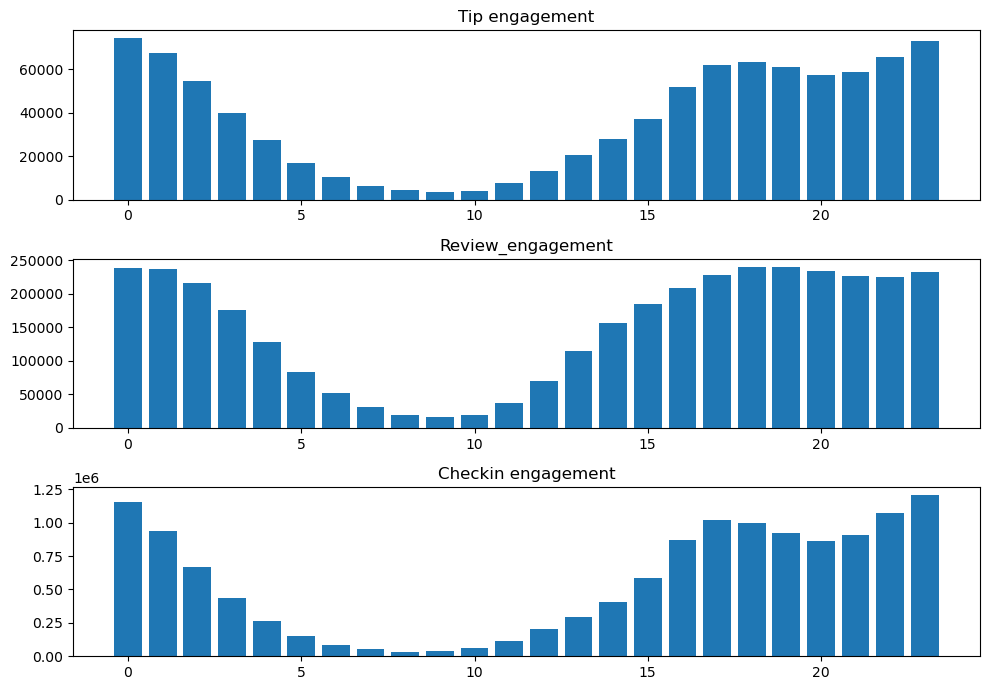

In [61]:
plt.figure(figsize= (10,7))
plt.subplot(3,1,1)
plt.title('Tip engagement')
plt.bar(tip_eng['hour'], tip_eng['tip_count'])

plt.subplot(3,1,2)
plt.title('Review_engagement')
plt.bar(review_eng['hour'], review_eng['review_count'])

plt.subplot(3,1,3)
plt.title('Checkin engagement')
plt.bar(checkin_eng['hour'], checkin_eng['checkin_count'])
plt.tight_layout()

The busiest hours for restaurants, based on user engagement, <b>span from 4 pm to 1 am. </b>